In [1]:
from urllib2 import urlopen
import numpy as np
import pandas
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

%matplotlib inline

In [2]:
url = 'http://stats191.stanford.edu/data/salary.table'
salary_table = pandas.read_table(url)

In [3]:
E = salary_table.E # Factor variable, 1 / 2 / 3
M = salary_table.M # Factor variable , 0 / 1
X = salary_table.X # experience, continuous variable
S = salary_table.S # salary, continuous outcome variable

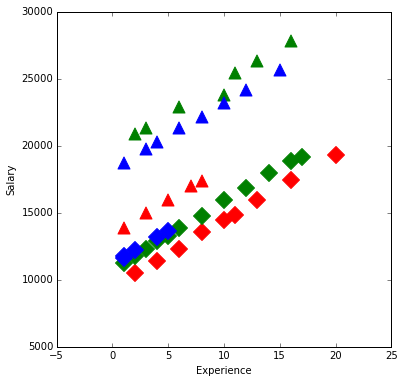

In [4]:
plt.figure(figsize=(6, 6));
symbols = ['D', '^']
colors = ['r', 'g', 'blue']
factor_groups = salary_table.groupby(['E', 'M'])
for values, group in factor_groups:
     i, j = values
     plt.scatter(group['X'], group['S'], marker=symbols[j], color=colors[i - 1],
                 s=144)

plt.xlabel('Experience');
plt.ylabel('Salary');

In [5]:
# fitting the linear model

formula = 'S ~ C(E) + C(M) + X'

lm = ols(formula, salary_table).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Sat, 05 Dec 2015   Prob (F-statistic):           2.23e-27
Time:                        19:12:06   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   8035.5976    386.689     20.781      0.000      7254.663  8816.532
C(E)[T.2]   3144.0352    361.968      8.686      0.000      2413.025  3875.045
C(E)[T.3]   2996.2103    411.753      7.277      0.000      2164.659  3827.762
C(M)[T.1]   6883.5310    313.919     21.928      0.000      6249.559  7517.503
X            546.1840     30.519     17.896      0.000       484.549   607.819
==============================================================================
Omnibus:                        2.293   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.362
Skew:                          -0.077   Prob(JB):                        0.506
Kurtosis:                       2.171   Cond. No.                         33.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# design matrix

# last column represents X
# second to last column represents M (0 or 1)
# columns 2 and 3 represent E (1, 2, 3)
    # 0, 0 --> E = 1
    # 1, 0 --> E = 2
    # 0, 1 --> E = 3
# first column for y-intercept (beta naught)

X = lm.model.data.orig_exog

In [8]:
# test interactions with anova

# does X interact with E?

interX_lm = ols("S ~ C(E) * X + C(M)", salary_table).fit()
interX_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     158.6
Date:                Sat, 05 Dec 2015   Prob (F-statistic):           8.23e-26
Time:                        19:12:07   Log-Likelihood:                -379.47
No. Observations:                  46   AIC:                             772.9
Df Residuals:                      39   BIC:                             785.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    7256.2800    549.494     13.205      0.000      6144.824  8367.736
C(E)[T.2]    4172.5045    674.966      6.182      0.000      2807.256  5537.753
C(E)[T.3]    3946.3649    686.693      5.747      0.000      2557.396  5335.333
C(M)[T.1]    7102.4539    333.442     21.300      0.000      6428.005  7776.903
X             632.2878     53.185     11.888      0.000       524.710   739.865
C(E)[T.2]:X  -125.5147     69.863     -1.797      0.080      -266.826    15.796
C(E)[T.3]:X  -141.2741     89.281     -1.582      0.122      -321.861    39.313
==============================================================================
Omnibus:                        0.432   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.590
Skew:                           0.144   Prob(JB):                        0.744
Kurtosis:                       2.526   Cond. No.                         69.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# anova check

table1 = anova_lm(lm, interX_lm)

table1

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,41,43280719.492876,0,NaN,NaN,NaN
1,39,39410679.807560,2,3870039.685316,1.914856,0.160964


In [14]:
res2 = ols(formula, X).fit()



In [17]:
print res2.summary()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Sat, 05 Dec 2015   Prob (F-statistic):           2.23e-27
Time:                        19:21:41   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   8035.5976    386.689     20.781      0.0